In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/3_outlier_IQR/heights.csv')
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [3]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [6]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3-Q1
IQR , Q1 , Q3

(0.9249999999999998, 5.3500000000000005, 6.275)

In [7]:
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [8]:
df1 = df[(df['height']<upper) & (df['height']>lower)]

In [9]:
df1

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


# EXERCISE 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [11]:
fd=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/3_outlier_IQR/Exercise/height_weight.csv')
fd

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

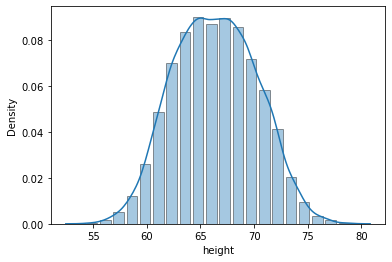

In [12]:
sns.distplot(fd['height'],bins=20 , hist_kws={'rwidth':0.8,'edgecolor':'black'})

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

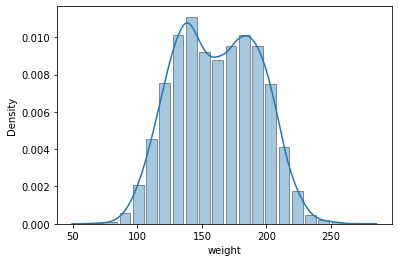

In [13]:
sns.distplot(fd['weight'],bins=20 , hist_kws={'rwidth':0.8,'edgecolor':'black'})

In [14]:
fd.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


#  for height outliers

In [19]:
Q1= fd['height'].quantile(0.25)
Q3= fd['height'].quantile(0.75)
IQR_height = Q3-Q1

In [20]:
h_lower= Q1-1.5*IQR_height
h_upper= Q3+1.5*IQR_height
fd2=fd[(fd['height']>h_lower) & (fd['height']<h_upper)]
fd2

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# for weight outliers

In [28]:
w_Q1 = fd['weight'].quantile(0.25)
w_Q3 = fd['weight'].quantile(0.75)
IQR_W =w_Q3 - w_Q1

In [34]:
lower_w=w_Q1-1.5*IQR_W
upper_w=w_Q3+1.5*IQR_W
lower_w , upper_w

(58.79084096072856, 264.19673521345646)

In [35]:
fd3=fd[(fd['weight']>lower_w) & (fd['weight']<upper_w)]

In [36]:
fd3

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [37]:
fd[(fd['weight']<lower_w) | (fd['weight']>upper_w)]

,gender,height,weight
2014,Male,78.998742,269.989699
